## Ομάδα

Στοιχεία Μέλους 1: Γιώργος Παγώνης

#### Στο zip θα υπάρχουν  τα αρχεία που έχω κάνει save . Θα είναι στο docs για να μην χρειαστειτε να τρέξετε τον κώδικα , άμα δεν θέλετε. 

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 1

---

## Μέρος 1

### Λύση :

---

Για να δημιουργήσουμε τον λαβίρινθο δεν χρησιμοποίησαμε κάποιο από τους δωθέν αλγορίθμους.
Ο τρόπος με τον οποιό υλοποιούμε τον λαβίρινθο είναι οι εξής:
-    Ξεκινάμε από το σημείο αφετερίας S . 
-    Διαλέγουμε έναν από τους γείτονες του τυχαία ( ανάλογα με την θέση του).
-    Αύτον τον μετατρέπουμε σε δρόμο ( grid[ ].true).
-    Συνεχίζουμε αλλάζοντας τον current node στον γείτονα εώς φτάσουμε στον τερματισμό F. 

Για να λύσουμε το πρόβλημα ότι θα πρέπει να έχει τουλάχιστον 2 μονοπάτια από το S,F ξεκινάμε 2 μονοπάτια από το S ταύτοχρονα και ανεξάρτητα , μέχρι να φτάσουν και τα 2 στο F.


#### Παραθέτουμε παραδείγματα λαβυρίνθων
- map = Maze(11, (3,4), (7, 9))
<img src="docs/lab11.png" width="400" height="200">
- map = Maze(20, (3,4), (7, 9))
<img src="docs/lab20.png" width="400" height="200">
- map = Maze(33, (3,4), (26, 26))
<img src="docs/lab33.png" width="400" height="200">

### Ακολούθει ο κώδικας:

In [1]:
%matplotlib inline
import numpy as np
from queue import LifoQueue
import  random 
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

In [2]:
class Maze:
    def __init__(self, N, S, F):
        """
          N: integer that indicates the size of the NxN grid of the maze
          S: pair of integers that indicates the coordinates of the starting point (S)
          F: pair of integers that indicates the coordinates of the finish point (F)
          You can add any other parameters you want to customize maze creation (e.g. variables that
          control the creation of additional paths)
          """

        assert N > 2

          ## Make sure start and end are within the grid

        assert S[0] < N-1
        assert S[1] < N-1
        assert F[0] < N-1
        assert F[1] < N-1

        assert S[0] > 0
        assert S[1] > 0
        assert F[0] > 0
        assert F[1] > 0

        # Add here any additional constraints your implementation may have

        self.N = N
        self.S = S
        self.F = F
        

        # Grid initialized with obstacles (array of 0/False)
        # 1/True indicates available cells
        self.grid = np.zeros((N, N), dtype=bool)

        self.grid[S[0]][S[1]] = True
        self.grid[F[0]][F[1]] = True
        
        ## YOUR CODE HERE
        
        def is_square(self,T):
            if self.grid[T[0]-1][T[1]] == True and self.grid[T[0]][T[1]-1] == True and self.grid[T[0]-1][T[1]-1] == True  : return True
            if self.grid[T[0]-1][T[1]] == True and self.grid[T[0]][T[1]+1] == True and self.grid[T[0]-1][T[1]+1] == True  : return True
            if self.grid[T[0]][T[1]+1] == True and self.grid[T[0]+1][T[1]+1] == True and self.grid[T[0]+1][T[1]] == True  : return True
            if self.grid[T[0]][T[1]-1] == True and self.grid[T[0]+1][T[1]] == True and self.grid[T[0]+1][T[1]-1] == True  : return True
            return False
        def pos_nbrs(S):
            pos_cells = []
            if S[0]==1 and S[1]==1:#up-left
                pos_cells.append((S[0],S[1]+1))
                pos_cells.append((S[0]+1,S[1]))
            elif S[0]==1 and S[1] == N-2:#up-right
                pos_cells.append((S[0],S[1]-1))
                pos_cells.append((S[0]+1,S[1]))
            elif S[0]==N-2 and S[1] == 1:#down-left
                pos_cells.append((S[0],S[1]+1))
                pos_cells.append((S[0]-1,S[1]))
            elif S[0]==N-2 and S[1] == N-2:#down-right
                pos_cells.append((S[0],S[1]-1))
                pos_cells.append((S[0]-1,S[1]))
            elif S[0]==1:#up_wall
                pos_cells.append((S[0],S[1]-1))
                pos_cells.append((S[0],S[1]+1))
                pos_cells.append((S[0]+1,S[1]))
            elif S[0]==N-2:#down_wall
                pos_cells.append((S[0],S[1]-1))
                pos_cells.append((S[0],S[1]+1))
                pos_cells.append((S[0]-1,S[1]))
            elif S[1]==1:#left_wall
                pos_cells.append((S[0]-1,S[1]))
                pos_cells.append((S[0]+1,S[1]))
                pos_cells.append((S[0],S[1]+1))
            elif S[1]==N-2:#right_wall
                pos_cells.append((S[0]-1,S[1]))
                pos_cells.append((S[0]+1,S[1]))
                pos_cells.append((S[0],S[1]-1))
            else :
                pos_cells.append((S[0]-1,S[1]))
                pos_cells.append((S[0]+1,S[1]))
                pos_cells.append((S[0],S[1]-1))
                pos_cells.append((S[0],S[1]+1))
            return pos_cells
            
        def rand_neighbor(self,S,F,P):
            #this function return a random neighbor of S
            
            pre_nbrs = pos_nbrs(S)
            nbrs = []
            for i in pre_nbrs :
                if i != P:
                    nbrs.append(i)
                        
            while len(nbrs) != 0:
                a = random.choice(nbrs)
                if self.grid[a[0]][a[1]] == True:
                    return a 
                else :
                    if is_square(self,a)==True:
                        nbrs.remove(a)
                    else: return a
            return P

        i = 0
        a = (-1,-1)
        temp=(-1,-1)
        b = S
        a1 = (-1,-1)
        temp1 = (-1,-1)
        b1 = S
        
        fin = False 
        fin1 = False
        while (fin==False and fin1==False) or  i<=(self.N*self.N):
            if i>= (self.N*self.N):
                break
            temp = rand_neighbor(self,b,F,a)
            if temp == F :
                fin = True
            #print(i,"Temp: ",temp)
            self.grid[temp[0]][temp[1]]=True
            a = b
            b =temp
            
            temp1 = rand_neighbor(self,b1,F,a1)
            self.grid[temp1[0]][temp1[1]]=True
            a1 = b1
            b1 = temp1
            if temp1 == F :
                fin1 = True
            
            i+=1
            
       
    def draw_map(self, path=None):
        """ Draws the maze as an image. Considers grid values of 0/False to represent obstacles and
        values of 1/True to represent empty cells, but this can be customized. Obstacles are painted
        black and empty cells are painted white. Starting point is painted green and finish point red.
        Optionally accepts as a parameter a path within the maze which is painted blue. 
        """
        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[~self.grid] = [0, 0, 0]
        image[self.grid] = [255, 255, 255]

        # Uncomment the next 2 lines of code to treat 1/True as obstacles (and 0/False as free maze cells)
        # image[self.grid] = [0, 0, 0]
        # image[~self.grid] = [255, 255, 255]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()

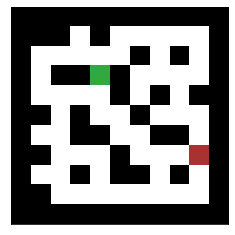

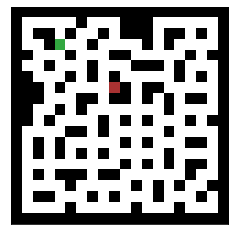

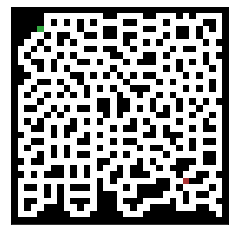

In [3]:
map = Maze(11, (3,4), (7, 9))
map.draw_map()
map = Maze(20, (3,4), (7, 9))
map.draw_map()
map = Maze(33, (3,4), (26, 26))
map.draw_map()

--- 

## Μέρος 2

Εδώ υλοποιούμε τον αλγόριθμο A* για την εύρεση συντομότερων μονοπατιών

Προσθέτουμε και το visualization για μετά.

### Ερωτήσεις 

- Με $g(n) = 0$ και $h(n) = \{manhattan(n),euclidian(n)\}$ προκύπτει ο αλγόριθμος Best First, ο οποίος βρίσκει πάντα λύση, αλλά όχι βελτιστη σίγουρα.
- Με $g(n) = 1$ και $h(n) = 0$ προκύπτει Breadth First Search αλγόριθμος, αφού επιλέγεται κάθε φορά ο κόμβος με μικρότερη απόσταση απ'την αφετηρία $F$, ο οποίος βρίσκει πάντα τη βέλτιστη λύση (θεωρώντας ότι οι κόμβοι δεν έχουν βάρη ίδια προφανώς)
- Με $g(n) = 1$ και $h(n) = \{manhattan(n),euclidian(n)\}$ προκύπτει ο A* ο οποίος βρίσκει πάντα λύση, αλλά βέλτιστη μόνο αν ο ευριστικός μηχανισμός είναι αποδεκτός (admissible), δηλαδή εδώ και για τις δύο $\{manhattan(n),euclidian(n)\}$ θα βρίσκει βέλτιστη λύση.

### Για μια ακόμα ευρετική θα χρησιμοποιήσουμε την Chebyshev Distance
---
Η υλοποιήση είναι :

cd(x,y) = max(y2 - y1, x2 - x1)

In [4]:
class visualization:
    def __init__(self, S, F):
        '''
          Η μέθοδος αυτή αρχικοποιεί ένα αντικείμενο τύπου visualization.
          Είσοδος: 
          -> S: το σημείο εκκίνσης της αναζήτησης
          -> F: το σημείο τερματισμού
        '''
        self.S = S
        self.F = F
        self.images = []
    
    def draw_step(self, grid, frontier, expanded_nodes):
        '''
          Η συνάρτηση αυτή καλείται για να σχεδιαστεί ένα frame στο animation (πρακτικά έπειτα από την επέκταση κάθε κόμβου)
          Είσοδος: 
          -> grid: Ένα χάρτης τύπου grid
          -> frontier: Μια λίστα με τους κόμβους που ανήκουν στο μέτωπο της αναζήτησης
          -> expanded_nodes: Μια λίστα με τους κόμβους που έχουν ήδη επεκταθεί
          Επιστρέφει: None
          Η συνάρτηση αυτή πρέπει να καλεστεί τουλάχιστον μια φορά για να μπορέσει να σχεδιαστει ένα animation (πρεπεί το animation να έχει τουλάχιστον ένα frame).
        '''
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
        image[~grid.grid] = [0, 0, 0]
        image[grid.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[grid.grid] = [0, 0, 0]
        # image[~grid.grid] = [255, 255, 255]
        for node in expanded_nodes:
            image[node.position] = [0, 0, 128]

        for node in frontier:
            image[node.position] = [0, 225, 0]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)
    
    def add_path(self, path):
        '''
          Η συνάρτηση αυτή προσθέτει στο τελευταίο frame το βέλτιστο μονοπάτι.
          Είσοδος:
          -> path: Μια λίστα η όποια περιέχει το βέλτιστο μονοπάτι (η οποία πρέπει να περιέχει και τον κόμβο αρχή και τον κόμβο στόχο)
          Έξοδος: None
        '''
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        for _ in range (10):
            self.images.append(image)
        
    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani
        
    def save_gif(self, filename, fps = 30):
        '''
            Η συνάρτηση αυτή ξαναδημιουργεί και αποθηκεύει το animation σε ένα αρχείο.
            Είσοδος:
            -> Το όνομα του αρχείου με κατάληξη .gif
            Έξοδος: (None)
        '''
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        '''
            Η συνάρτηση αυτή εμφανίζει inline το animation.
            Είσοδος:
            -> fps: τα frames per second
            Έξοδος: Το αντικείμενο που παίζει το animation
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        '''
            Η μέθοδος αυτή εμφανίζει inline το τελευταίο frame που έχει δημιουργήθει.
            Είσοδος:
            Έξοδος: Το αντικείμενο που εμφανίζει την εικόνα.
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

In [5]:
class Node:
    # Initialize the class
    def __init__(self, position:(), parent:()):
        self.position = position
        self.parent = parent
        self.g = 0 # Distance to start node
        self.h = 0 # Distance to goal node
        self.f = 0 # Total cost
        
        # Compare nodes
    def __eq__(self, other):
        return self.position == other.position
    # Sort nodes
    def __lt__(self, other):
         return self.f < other.f
        
class Pathfinder:
    def __init__(self, maze, c, h):
        """
        maze : Αντικείμενο τύπου Maze (από Μέρος 1)
        c : Συνάρτηση που υπολογίζει την πραγματική απόσταση μεταξύ δύο σημείων
        h : Συνάρτηση που υπολογίζει την ευριστική μεταξύ δύο σημείων
        """
        self.maze = maze
        self.vis = visualization(maze.S, maze.F)
        self.path = []
        self.cost = c
        self.heuristic = h
        self.open_list = []#metopo anazitisis
        self.closed_list = []#kleisto synolo
        
    ### Fill the path list with the coordinates of each point in the path from maze.S to maze.F
    ### Your code here
        def find_neighbors(T):
            nbrs = []
            if self.maze.grid[T[0]-1][T[1]]==True:nbrs.append((T[0]-1,T[1]))
            if self.maze.grid[T[0]+1][T[1]]==True:nbrs.append((T[0]+1,T[1]))
            if self.maze.grid[T[0]][T[1]+1]==True:nbrs.append((T[0],T[1]+1))
            if self.maze.grid[T[0]][T[1]-1]==True:nbrs.append((T[0],T[1]-1))
            return nbrs

        def add_to_opened(opened,neighbor):
            for node in opened:
                if (neighbor.position == node.position and neighbor.f >= node.f):
                    return False
            return True
                
        
        def a_star():
            #save position,g,h
            start_node = Node(self.maze.S,None)
            goal_node = Node(self.maze.F,None)
            
            self.open_list.append(start_node)

            while len(self.open_list)>0:
                self.open_list.sort()
                
                current_node = self.open_list.pop(0)
                self.closed_list.append(current_node)
                #fix the list with correct value nodes
                #smallest.element
                
                if current_node == goal_node:
                    tmp_path =[]
                    while current_node != start_node:
                        tmp_path.append(current_node.position)
                        current_node = current_node.parent
                       
                    tmp_path.append(start_node.position)
                    self.vis.add_path(tmp_path) 
                    return tmp_path[::-1]
                
                neighbors = find_neighbors(current_node.position)
            
                for nbr in neighbors:

                    tmp = Node(nbr,current_node)

                    if tmp in self.closed_list:
                        continue

                    tmp.g = self.cost(self.maze.S,tmp.position) 
                    tmp.h = self.heuristic(self.maze.F,tmp.position)
                    tmp.f = tmp.g + tmp.h

                    if add_to_opened(self.open_list,tmp) == True:
                        self.open_list.append(tmp)
                self.vis.draw_step(self.maze,self.open_list,self.closed_list)

            #Return None, if no path is found
            return None
                
        self.path = a_star()    
                
                
    def get_expa(self):
        return self.closed_list
    def get_path(self):
        return self.path

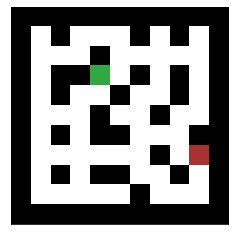

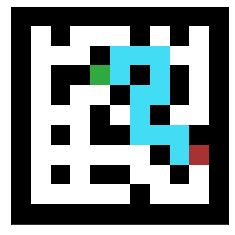

In [6]:
def manhattan(a,b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])
def euclidean(a,b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1])**2)
def chebyshev(a,b):
    return max(abs(a[1]-b[1]),abs(a[0]-b[0])) 
map = Maze(11, (3,4), (7, 9))
map.draw_map()
pf = Pathfinder(maze=map, c = lambda x, y: 0, h = euclidean)
map.draw_map(pf.get_path())
pf.vis.show_gif(fps = 1)
#pf.vis.save_gif("maze_11_eu.gif",fps = 1)

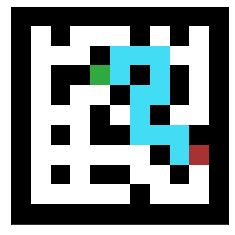

CPU times: user 50.7 ms, sys: 0 ns, total: 50.7 ms
Wall time: 50 ms


In [7]:
%%time
pf = Pathfinder(maze=map, c = lambda x, y: 0, h = euclidean)
map.draw_map(pf.get_path())

## Μέρος 3 
---
Σε αύτο μέρος μετράμε τo μήκος του ελάχιστου μονοπάτιου που βρίσκει ο καθένας από τους 3 αλγορίθμους και το πλήθος των expanded nodes .

Τρέχουμε για πλήθος λαβυρίνθων με μέγεθος Ν = \[10..10\] και 10 λαβυρίνους σε κάθε Ν . Για αυτούς τους 10 λαμβάνουμε τον μέσο όρο των τιμών τους και τα παρουσιάζουμε σε ένα γράφημα. 

Οι αλγόριθμοι που χρησιμοποιήθηκαν είναι :
- 𝑔(𝑛)=0  και ℎ(𝑛)={manhattan(𝑛)}
- 𝑔(𝑛)=1 και ℎ(𝑛)=0
- 𝑔(𝑛)=1 και ℎ(𝑛)={manhattan(𝑛),euclidean(𝑛)}

---

This will take some time!!

But the results for one interation are :
Length of Path:
<img src="docs/PathvsMapSize.png" width="400" height="200">
Length of Expaned Nodes
<img src="docs/LenghtvsMapSize.png" width="400" height="200">

---

In [8]:
alg_path1 = []
alg_path2 = []
alg_path3 = []
alg_expa1 = []
alg_expa2 = []
alg_expa3 = []
for i in range(10,51):#size of lab
    path1 = path2 = path3 = 0
    expa1 = expa2 = expa3 = 0
    for j in range(10):#interation
        map = Maze(i, (1,1), (i-2, i-2))
        pf1 = Pathfinder(maze=map, c = lambda x, y: 0, h = manhattan)
        if pf1.get_path()!=None and pf1.get_expa()!=None:
            path1 += len(pf1.get_path())
            expa1 += len(pf1.get_expa())
        pf2 = Pathfinder(maze=map, c = lambda x, y: 1, h = lambda x, y: 0)
        if pf2.get_path()!=None and pf2.get_expa()!=None:
            path2 += len(pf2.get_path())
            expa2 += len(pf2.get_expa())
        pf3 = Pathfinder(maze=map, c = lambda x, y: 1, h = euclidean)
        if pf3.get_path()!=None and pf3.get_expa()!=None:
            path3 += len(pf3.get_path())
            expa3 += len(pf3.get_expa())
    alg_path1.append(path1//10)
    alg_path2.append(path2//10)
    alg_path3.append(path3//10)
    alg_expa1.append(expa1//10)
    alg_expa2.append(expa2//10)
    alg_expa3.append(expa3//10)


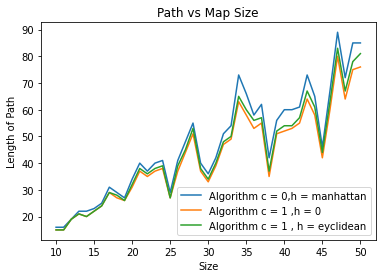

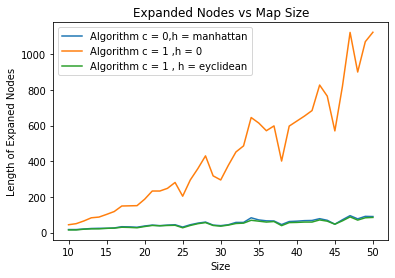

In [9]:
x = []
for i in range(10,51):
    x.append(i)
    
plt.plot(x,alg_path1)
plt.plot(x,alg_path2)
plt.plot(x,alg_path3)
plt.legend(["Algorithm c = 0,h = manhattan","Algorithm c = 1 ,h = 0","Algorithm c = 1 , h = eyclidean"])
plt.title("Path vs Map Size")
plt.xlabel("Size")
plt.ylabel("Length of Path")
plt.show()
#plt.savefig("PathvsMapSize.png")

plt.plot(x,alg_expa1)
plt.plot(x,alg_expa2)
plt.plot(x,alg_expa3)
plt.legend(["Algorithm c = 0,h = manhattan","Algorithm c = 1 ,h = 0","Algorithm c = 1 , h = eyclidean"])
plt.title("Expanded Nodes vs Map Size")

plt.xlabel("Size")
plt.ylabel("Length of Expaned Nodes")
plt.show()
#plt.savefig("LenghtvsMapSize.png")

### Παρατηρήσεις 
---
Βλέπουμε ό,τι ενώ οι αλγόριθμοι βρίσκουν περίπου τον ίδιο χρόνο για το path , κοντά στο βέλτιστο , ο 2 αλγόριθμος περνάει από πολλούς expanded nodes για βγάλει το αποτέλεσμα(Είναι ο Dijkstra ) . Όσο μεγαλώνει το Ν τόσο μεγαλώνει πολυπλοκότητα(expaned nodes) και προφανώς το μέγεθος του μονοπατίου.

## Μέρος 4

Λόγω ενός προβλήματος στο pc μου να τρέξει το module google.colab έτρεξα την συνάρτηση draw στο google colab και αποθήκευσα τα σχεδιασμένα με το χέρι mazes στο φάκελο docs.

---
Ακολουθεί ο κώδικας που εμένα δεν μου τρέχει.

In [10]:
"""from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import PIL"""

#canvas_html = """
"""<canvas width=301 height=301></canvas>
<br>

<button id = "start" style="background-color: #008000">Start</button>
<button id = "end" style="background-color: #800000">End</button>
<button id = "finish">Finish</button>
<script>

var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

for (var x = 0.5; x < 301; x += 20) {
  ctx.moveTo(x, 0);
  ctx.lineTo(x, 300);
}

for (var y = 0.5; y < 301; y += 20) {
  ctx.moveTo(0, y);
  ctx.lineTo(300, y);
}

ctx.strokeStyle = "#000";
ctx.stroke();

var button = document.getElementById('finish')
var start_button = document.getElementById('start')
var end_button = document.getElementById('end')


start_button.onclick = ()=>{
    ctx.fillStyle="#008000";
  }

end_button.onclick = ()=>{
    ctx.fillStyle="#800000";
  }
   

var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})

function getMousePos(canvas, evt) {
        var rect = canvas.getBoundingClientRect();
        return {
          x: evt.x - rect.left,
          y: evt.y - rect.top
        };
      }

function getNearestSquare(position) {
    var x = position.x;
    var y = position.y;

    if (x < 0 || y < 0) return null;
    x = (Math.floor(x / 20) * 20) + 0.5
    y = (Math.floor(y / 20) * 20) + 0.5
    return {x: x, y: y};
}

function containsObject(obj, list) {
    var i;
    for (i = 0; i < list.length; i++) {
        if (list[i].x === obj.x && list[i].y == obj.y) {
            return i;
        }
    }
    return -1;
}

borders = []

canvas.onmousedown = ()=>{
    var pos = getNearestSquare(getMousePos(canvas, mouse));
    if (pos != null) {
        index = containsObject(pos, borders)
        if (index != -1){
            borders.splice(index, 1)
            ctx.clearRect(pos.x + 1, pos.y, 19, 19)
        }
        else{
            ctx.fillRect(pos.x+1,pos.y+1,18,18);
            borders.push(pos)
        }
        ctx.fillStyle="#000000";
    }
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

"""def draw(filename='drawing.png'):
  display(HTML(canvas_html))
  data = eval_js("data")
  print (data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)


draw()
"""

'def draw(filename=\'drawing.png\'):\n  display(HTML(canvas_html))\n  data = eval_js("data")\n  print (data)\n  binary = b64decode(data.split(\',\')[1])\n  with open(filename, \'wb\') as f:\n    f.write(binary)\n  return len(binary)\n\n\ndraw()\n'

In [11]:
import PIL
def find_points(image_array, pixels):
    points = []
    for grid_i, i in enumerate(range (10, image_array.shape[0]-10, 20)):
        for grid_j, j in enumerate(range (10, image_array.shape[1]-10, 20)):
            if np.array_equal(image_array[i][j], pixels):
                points.append([grid_i+1, grid_j+1])
    return points

def load_maze(fname='/content/drawing.png'):
    N = 17
    image = PIL.Image.open(fname)
    image_array = np.round(np.array(image)/255)

    start_x, start_y = find_points(image_array, [0,1,0,1])[0]
    end_x, end_y = find_points(image_array, [1, 0, 0, 1])[0]
    walls = find_points(image_array, [0, 0, 0, 1])
    new_grid = Maze(N, (start_x, start_y), (end_x, end_y))

    for i in range(N):
        for j in range(N):
            if [i, j] in walls:
                new_grid.grid[i,j] = 0
            else:
                new_grid.grid[i, j] = 1

    g = new_grid
    g.draw_map()
    return g

## 4.1

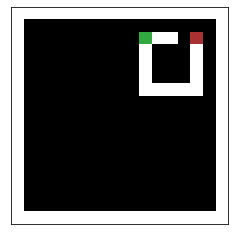

In [12]:
g = load_maze('docs/4.1.png')

### Παρατηρήσεις

Ο αλγόριθμος Hill Climbing δεν θα βρεί λύση στο παραπάνω πρόβλημα γιατί στοχεύει στο να βρεί greedy το τοπικό μέγιστο. Όταν κανένας από του γείτονες του δεν του δίνει καλύτερα αποτελέσματα , αποτύνχανει και δεν βρίσκει λύση.

## 4.2

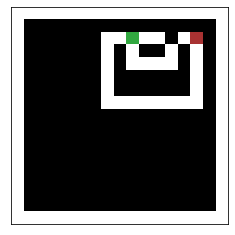

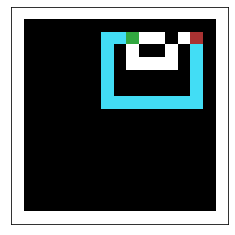

In [13]:
g = load_maze('docs/4.2.png')
pf = Pathfinder(g, c = lambda x, y: 0, h = euclidean)
g.draw_map(pf.get_path())
pf.vis.show_gif()
#pf.vis.save_gif("docs/4.2.gif",fps = 1)

### Παρατηρήσεις

Στον παραπάνω maze ο A* αργεί όσο το δυνατόν περισσότερο για να βρεί το βέλτιστο μονοπάτι ανεξαρτήτος της μετρικής απόστασης γιατί αναγκάζεται να τρέξει όλον τον maze για να καταληξει στην λύση. (Αυτό είναι προφανές και από το docs/4.2.gif

---
Η διαφορετική μετρική απόσταση (Eucledean/Manhattan) ως ευριστικής οδηγεί τον Α* να βρίσκει το μονοπάτι πιο γρήγορα σε μονοπάτια τα οποία ταυτίζονται με το μονοπάτι της ευριστικής . Δηλαδη στην Eucledean το μονοπάτι τύπου starecase , ενώ στην Manhattan να σχηματίζει ένα Γ: 
- Eucledean
<img src="docs/eucledean.png" width="200" height="100">
- Manhattan
<img src="docs/manhattan.png" width="200" height="100">

## 4.3

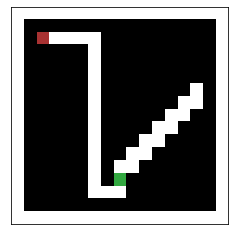

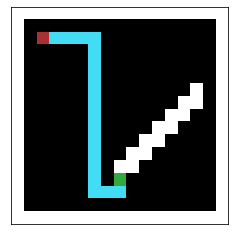

In [14]:
g = load_maze('docs/4.3.png')
pf = Pathfinder(g, c = lambda x, y: 1, h = manhattan)
g.draw_map(pf.get_path())
pf.vis.show_gif()
#pf.vis.save_gif("docs/4.3.gif",fps = 1)

### Παρατηρήσεις

Σε αυτή την περίπτωση ο Greedy Best-First αργεί σημαντικά περισσότερο από τον Α* για να καταλήξει στο στόχο γιατί ο Greedy Θα πάρει το starecase μονοπάτι αντί για το βέλτιστο. Θα συμπεριφερθουν το ίδιο όταν c = lambda x, y: 0, h = euclidean.

## 4.4

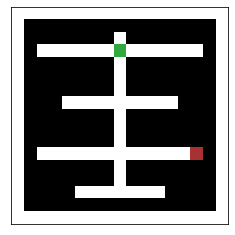

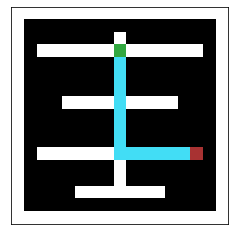

In [15]:
g = load_maze('docs/4.4.png')
pf = Pathfinder(g, c = lambda x, y: 0, h =lambda x, y: 0)#Dijkstra
g.draw_map(pf.get_path())
pf.vis.show_gif()
#pf.vis.save_gif("docs/4.4.gif",fps = 1)

### Παρατηρήσεις

Ο Α* καταφέρνει να βρει το μονοπάτι προς το στόχο σημαντικά πιο γρήγορα από τον Dijkstra.Για τον αλγόριθμο του Dijkstra δεν μας ενδιαφέρει η ευριστική h()= 0 γιαυτο δεν μπορούμε να ξεχωρίσουμε την καλύτερη διαδρομή από τις 4 που παρουσιάζονται στο σχήμα , οπότε τις τεστάρουμε όλες παράλληλα και χάνουμε χρόνο . Ωστόσο στον A* χρησιμοποίοντας την ευριστική τότε κινούμαστε πάντα προς την μικρότερη απόσταση του στόχου F και έτσι ο A* βρίσκει το σωστό μονοπάτι σημαντικά ποιο γρήγορα.Στο συγκεκριμένο maze ενώ τα εμπόδια και ο αριθμός τους επηρέαζουν σημαντικά τον Dijkstra (2 παράλληλες ευθείες που αποπροσανατολίζουν τον Dijkstra), δεν προκαλούν καμία αλλαγή στομ αριθμό βημάτων του A*.

## 4.5

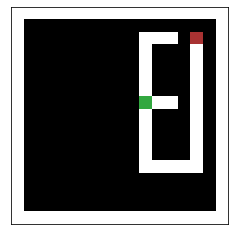

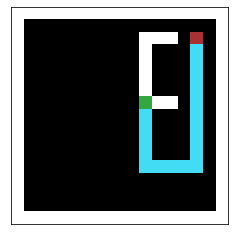

In [16]:
g = load_maze('docs/4.5.png')
pf = Pathfinder(g, c = lambda x, y: 0, h = lambda x, y: 0)
g.draw_map(pf.get_path())
pf.vis.show_gif()
#pf.vis.save_gif("docs/4.5.gif",fps = 1)

### Παρατηρήσεις

Σε αυτό τοι maze και ο A* και ο Dijkstra εκτελούν το ίδιο αριθμό βημάτων , αφού η μετρική απόσταση του A* τον οδήγει στα 2 λανθασμένα μονοπάτια μέχρι να βρεί την λύση. Το ίδιο σημβαίνει και με τον Dijkstra που ξεκινάει και στα 3 μονοπάτια ταυτόχρονα ,αλλά επειδή τα 2 λανθασμένα θα σταματήσουν πριν βρεί την λύση τότε και αυτός ο αλγόριθμος(έχουν μικρότερο μέγεθος) θα έχει εκτελέσει τον ίδιο αριθμό βημάτων(αφού θα έχει κάνει traverse όλο τον maze).